<a href="https://colab.research.google.com/github/khou128/QM2/blob/main/Project_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Word Frequency Analysis for Film Critic Reviews

Question:

Are reviews of popular/non-popular films more uniform or diverse in nature?

Do highly rated critic reviews relate to box office success?

First, I will visualise word frequency analysis of critic reviews for Avatar:

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/khou128/QM2/main/critics%20for%20Avatar.csv'
df = pd.read_csv(url)
df.head

<bound method NDFrame.head of           display-name          publication  \
0         Brian Eggert    Deep Focus Review   
1            Zach Pope    Zach Pope Reviews   
2     Douglas Davidson  Elements of Madness   
3         Allison Rose          FlickDirect   
4         Matt Brunson          Film Frenzy   
..                 ...                  ...   
307     Kirk Honeycutt   Hollywood Reporter   
308  Chris Hewitt (UK)      Empire Magazine   
309          Anna Keir     Independent (UK)   
310          Wendy Ide           Times (UK)   
311          The Sneak         The Sun (UK)   

                                           review-text  \
0    To be sure, this is an engaging experience in ...   
1    STUNNING epic.  Zoe Saldana performance… A fan...   
2    It’s the world of Pandora married to the groun...   
3    Cameron is a master filmmaker whose movies wil...   
4    While the visuals might rate four stars, the s...   
..                                                 ...   

In [3]:
print(df['review-text'])

0      To be sure, this is an engaging experience in ...
1      STUNNING epic.  Zoe Saldana performance… A fan...
2      It’s the world of Pandora married to the groun...
3      Cameron is a master filmmaker whose movies wil...
4      While the visuals might rate four stars, the s...
                             ...                        
307    The screen is alive with more action and the s...
308    It's a world, not to give too much away, that ...
309    There are myriad moments of beauty and of poig...
310    Avatar is an overwhelming, immersive spectacle...
311    It's a 3D movie people will look back on in ye...
Name: review-text, Length: 312, dtype: object


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-4-dfdd4af9555c>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('rainbow', len(top_words))


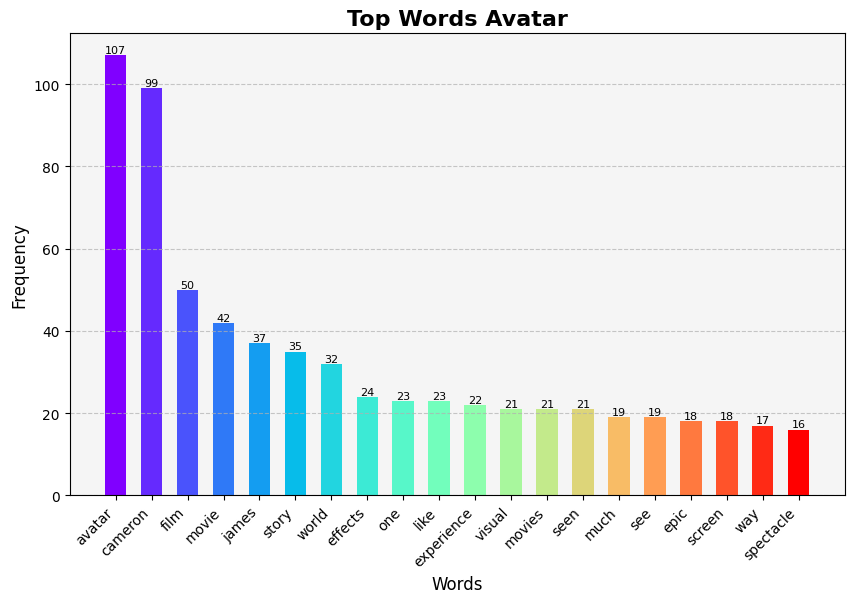

In [4]:
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from matplotlib import cm

text_data = ' '.join(df['review-text'].dropna())
words = word_tokenize(text_data)
stop_words = set(stopwords.words('english'))
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
freq_dist = FreqDist(words)
top_words = freq_dist.most_common(20)
colormap = cm.get_cmap('rainbow', len(top_words))
plt.figure(figsize=(10, 6))
bars = plt.bar(*zip(*top_words), color=colormap(range(len(top_words))), width=0.6, align='center')
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top Words Avatar', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.gca().set_facecolor('#F5F5F5')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=8)
plt.show()

Then, I shall repeat the steps done for the word frequency for the top 5 movies and bottom 5 movies from the TMDB 5000 Movie Dataset (https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata/data).

Top 5:
1. Avatar (2009)
2. Pirates of the Caribbean: At Worlds End (2007)
3. Spectre (2015)
4. The Dark Knight Rises (2012)
5. John Carter (2012)

Bottom 5:
1. My Date with Drew (2005)
2. Shanghai Calling (2012)
3. Newlyweds (2011)
4. El Mariachi (1992)
5. Cavite (2005)

Note that 'Signed, Sealed, Delivered' (2013) is a TV show. It is originally going to be the third of the bottom 5, but I will not include TV shows since this is a movie review analysis.

In [5]:
#Pirates of the Caribbean: At Worlds End
url1 = 'https://raw.githubusercontent.com/khou128/QM2/main/critics_for_Pirate.csv'
df1 = pd.read_csv(url1)
df1.head

<bound method NDFrame.head of                display-name               publication  \
0               Mike Massie       Gone With The Twins   
1            Joanne Laurier  World Socialist Web Site   
2           Micheal Compton  Bowling Green Daily News   
3         Debbie Lynn Elias           Behind The Lens   
4            Carlos Marañón         Cinemanía (Spain)   
..                      ...                       ...   
223            Emanuel Levy           EmanuelLevy.Com   
224           Diana Saenger         ReviewExpress.com   
225              Sean Burns       Philadelphia Weekly   
226           James O'Ehley   SA Movie & DVD Magazine   
227  Urban Cinefile Critics            Urban Cinefile   

                                           review-text  \
0    An epic finale, this overlong, overstuffed fil...   
1    Pirates of the Caribbean: At World's End is ma...   
2    At World's End is nearly three hours long, so ...   
3    Poised to bring in enough pirate booty to brea..

<ipython-input-6-fbee5fa9b658>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('rainbow', len(top_words))


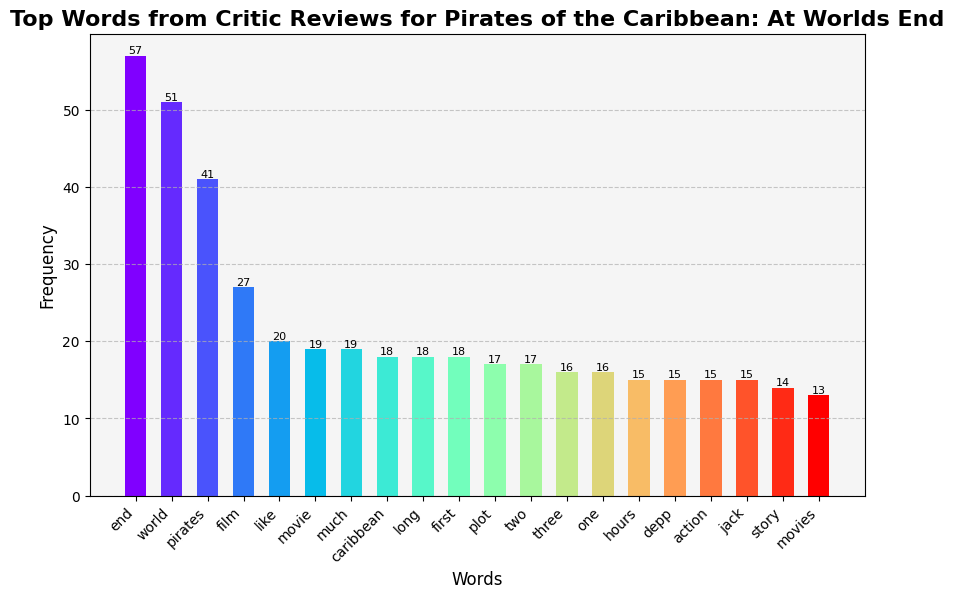

In [6]:
text_data = ' '.join(df1['review-text'].dropna())
words = word_tokenize(text_data)
stop_words = set(stopwords.words('english'))
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
freq_dist = FreqDist(words)
top_words = freq_dist.most_common(20)
colormap = cm.get_cmap('rainbow', len(top_words))
plt.figure(figsize=(10, 6))
bars = plt.bar(*zip(*top_words), color=colormap(range(len(top_words))), width=0.6, align='center')
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top Words from Critic Reviews for Pirates of the Caribbean: At Worlds End', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.gca().set_facecolor('#F5F5F5')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=8)
plt.show()

However, from these two charts we can see that the most mentioned words in the critics reviews are mainly the words from the movie title such as 'Avatar', 'end', and 'caribbean'; or words unrelated such as 'film' and 'movies'. These words are not really what we are interested in to investigate the popularity of the films. Hence, here is the modified version of the word frequency charts:

<ipython-input-7-e5e680825c3f>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('rainbow', len(top_words))


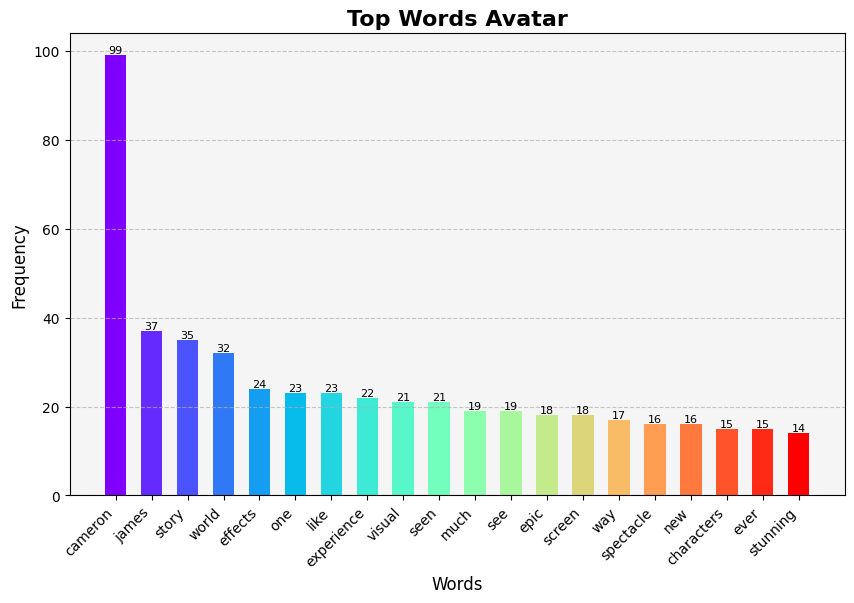

In [7]:
#Word frequency for Avatar:
text_data = ' '.join(df['review-text'].dropna())
words = word_tokenize(text_data)
stop_words = set(stopwords.words('english'))
exclude_words = ['avatar', 'film', 'films', 'movie', 'movies']  # Add the words to exclude
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words and word.lower() not in exclude_words] # Filter out stop words and excluded words
freq_dist = FreqDist(words)
top_words = freq_dist.most_common(20)
colormap = cm.get_cmap('rainbow', len(top_words))
plt.figure(figsize=(10, 6))
bars = plt.bar(*zip(*top_words), color=colormap(range(len(top_words))), width=0.6, align='center')
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top Words Avatar', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.gca().set_facecolor('#F5F5F5')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=8)
plt.show()


<ipython-input-8-dcc51f377e79>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('rainbow', len(top_words))


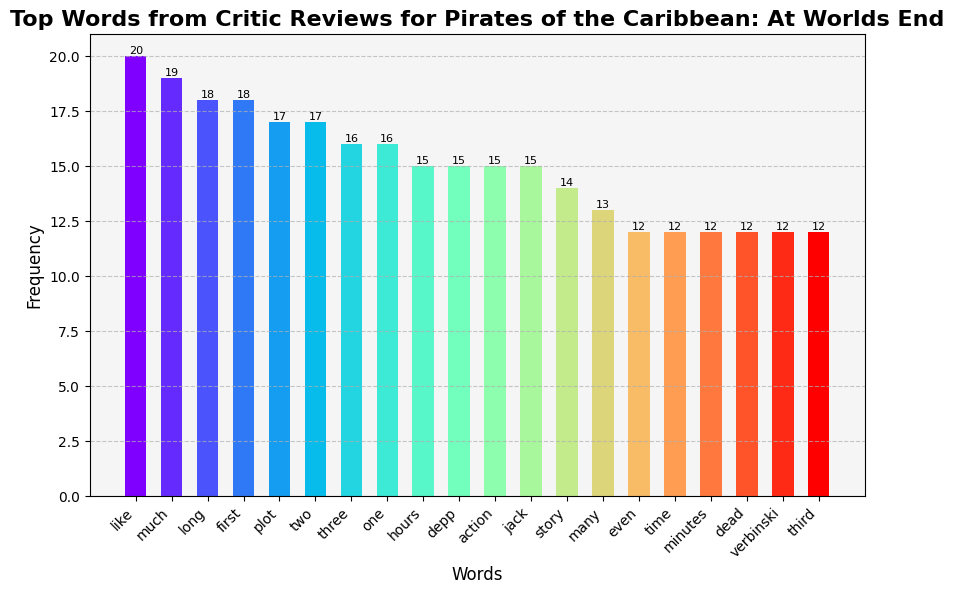

In [8]:
#Word frequency for Pirates of the Caribbean: At Worlds End:
text_data = ' '.join(df1['review-text'].dropna())
words = word_tokenize(text_data)
stop_words = set(stopwords.words('english'))
exclude_words = ['end','world','pirates','caribbean', 'film', 'films', 'movie', 'movies']  # Add the words to exclude
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words and word.lower() not in exclude_words] # Filter out stop words and excluded words
freq_dist = FreqDist(words)
top_words = freq_dist.most_common(20)
colormap = cm.get_cmap('rainbow', len(top_words))
plt.figure(figsize=(10, 6))
bars = plt.bar(*zip(*top_words), color=colormap(range(len(top_words))), width=0.6, align='center')
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top Words from Critic Reviews for Pirates of the Caribbean: At Worlds End', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.gca().set_facecolor('#F5F5F5')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=8)
plt.show()

I will now use the modified version of the word frequency chart code for the rest of the films. I will aim to combine the top 5 films reviews together to one dataset, and the bottm 5 together, to see the most frequent words.

In [9]:
#The rest of the top 5 movies:
#Spectre:
url2 = 'https://raw.githubusercontent.com/khou128/QM2/main/Spectre.csv'
df2 = pd.read_csv(url2)


#The Dark Knight Rises
url3 = 'https://raw.githubusercontent.com/khou128/QM2/main/THE%20DARK%20KNIGHT%20RISES.csv'
df3 = pd.read_csv(url3)

#John Carter
url4 = 'https://raw.githubusercontent.com/khou128/QM2/main/John%20Carter%20.csv'
df4 = pd.read_csv(url4)

In [10]:
#Merge top 5 critic reviews to one data frame:
top5 = pd.concat([df,df1,df2,df3,df4])

<ipython-input-14-08389d16f9ba>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('rainbow', len(top_words))


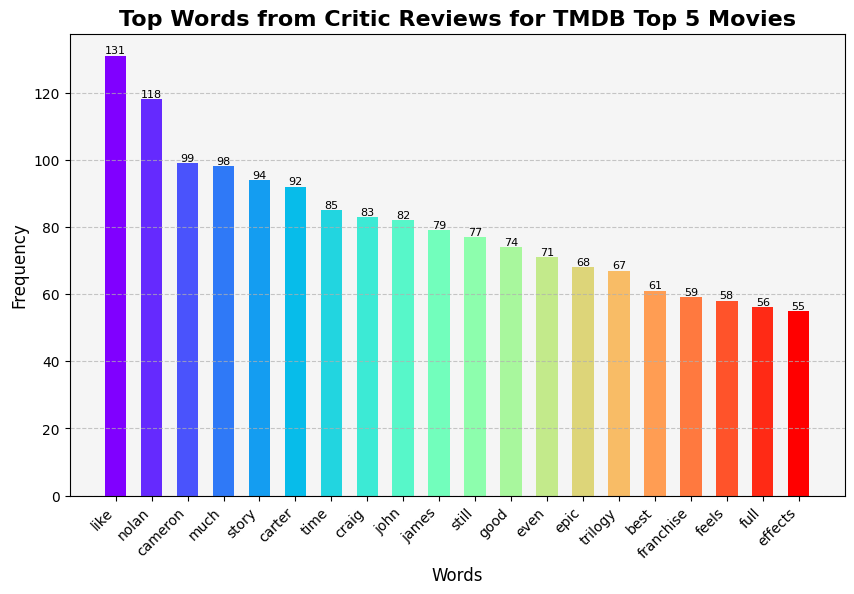

In [14]:
#Visualise the word frequency for top 5:
text_data = ' '.join(top5['review-text'].dropna())
words = word_tokenize(text_data)
stop_words = set(stopwords.words('english'))
exclude_words = ['bond', 'end','world','pirates','caribbean', 'film', 'films', 'movie', 'movies', 'spectre', 'dark','knight','avatar','action','world','one','rises','batman']  # Add the words to exclude
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words and word.lower() not in exclude_words] # Filter out stop words and excluded words
freq_dist = FreqDist(words)
top_words = freq_dist.most_common(20)
colormap = cm.get_cmap('rainbow', len(top_words))
plt.figure(figsize=(10, 6))
bars = plt.bar(*zip(*top_words), color=colormap(range(len(top_words))), width=0.6, align='center')
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top Words from Critic Reviews for TMDB Top 5 Movies', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.gca().set_facecolor('#F5F5F5')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=8)
plt.show()

We can see that it is mostly positive adjectives that associate with the top 5 movies, such as 'like', 'good', and 'epic'. Therefore, it can be interpreted that for popular movie reviews, they tend to be uniform in nature.

I will now turn to the bottom 5 movie critic reviews from the TMDB list, and conduct the same word frequency analysis.

From the number of critic reviews for the bottom 5 movies, we can already see the lack of attention to these movies. For instance, for 'My Date with Drew', there are only 62 critic reviews. Even worse for 'Shanghai Calling': 15 critic reviews.

In [ ]:
#Scraped csv files from the bottom 5 movies:
#My Date with Drew:


# 2. Sentiment Analysis of Critic Reviews

In [ ]:
#Now time for sentiment analysis...
%%capture
!pip install spacy
!pip install scattertext
!pip install tika
!pip install spacytextblob

In [ ]:
import spacy
import json
import pylab
from IPython.core.display import display, HTML
import nltk
from tika import parser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from spacytextblob.spacytextblob import SpacyTextBlob

%matplotlib inline
pylab.rcParams['figure.figsize'] = (10., 8.)
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

In [ ]:
text_of_77th_row = df.loc[76, 'review-text']

# apply the NLP pipeline to this text.
doc = nlp(text_of_77th_row)

print(text_of_77th_row)
print('Polarity: ', doc._.blob.polarity)
print('Subjectivity: ', doc._.blob.subjectivity)
print('Assessments: ', doc._.blob.sentiment_assessments.assessments)

Worthington and Saldana provide enough wattage to keep the film's human center alive and beating, while Cameron wraps their story in an armature of generally impressive 3D attractions as well as a righteousness that's touching yet all too simplistic
Polarity:  0.14285714285714285
Subjectivity:  0.4428571428571429
Assessments:  [(['enough'], 0.0, 0.5, None), (['human'], 0.0, 0.1, None), (['center'], -0.1, 0.1, None), (['alive'], 0.1, 0.4, None), (['generally', 'impressive'], 1.0, 1.0, None), (['touching'], 0.5, 0.5, None), (['simplistic'], -0.5, 0.5, None)]


In [ ]:
#Further, an overall score of the polarity and subjectivity...
from textblob import TextBlob
import pandas as pd

df['Polarity'] = df['review-text'].apply(lambda text: TextBlob(str(text)).sentiment.polarity)
df['Subjectivity'] = df['review-text'].apply(lambda text: TextBlob(str(text)).sentiment.subjectivity)

# Overall sentiment analysis for all texts
try:
    average_polarity = df['Polarity'].mean()
    average_subjectivity = df['Subjectivity'].mean()

    print('Overall Sentiment Analysis:')
    print('Average Polarity: ', average_polarity)
    print('Average Subjectivity: ', average_subjectivity)
except KeyError:
    print(f"Error: 'Polarity' or 'Subjectivity' columns not found in the DataFrame.")

Overall Sentiment Analysis:
Average Polarity:  0.18059390301745212
Average Subjectivity:  0.49443683768832575


From above we can see that the average polarity is positive, demonstrating overall the reviews for Avatar are expressing positive sentiment. The average subjectivity is just below 0.5, showing a neutral score for the level of subjectivity. (not so subjective)